In [230]:
import numpy as np
from typing import List, Callable
import matplotlib.pyplot as plt
import scipy
import tqdm.auto as tqdm
import scipy.stats as st

XM = 15

In [231]:
def draw_pareto(num_samples: int, alpha: float, xm: float) -> np.ndarray:
    
    return (1 + np.random.pareto(a = alpha, size = num_samples)) * xm

def plot_histogram(data: np.ndarray, num_bins):
    
    plt.hist(data, bins = num_bins, density = False)
    plt.show()
    
def get_one_point_likelihood(x: float, xm: float) -> Callable:
    
    return lambda alpha: 0 if x < xm else np.log((alpha * xm**alpha)/(x**(alpha + 1)))

def get_sample_likelihood(sample: np.ndarray, xm: float) -> Callable:
    
    sum_likelihood = lambda alpha: np.sum([get_one_point_likelihood(x=x, xm = xm)(alpha = alpha) for x in sample])
    return sum_likelihood 

def get_maximum_likelihood_alpha(sample, initial, xm) -> float:
    
    negative_likelihood_func = lambda alpha: - (get_sample_likelihood(sample, xm = xm))(alpha = alpha)
    best_alpha = scipy.optimize.fmin(negative_likelihood_func, x0 = initial, maxiter = 1000000)
    return best_alpha


def plot_sample_likelihood_by_alpha(sample, xm):
    
    alphas = np.arange(0.05, 20, 0.05)
    likelihoods = []
    for alpha in tqdm.tqdm(alphas):
        
        likelihoods.append(get_sample_likelihood(sample, xm = xm)(alpha = alpha))

    plt.plot(alphas, likelihoods)
    plt.show()

def calc_confidence_interval(xm, alpha, n = 100):
    
    alphas = []
    for i in tqdm.tqdm(range(n)):
        
        sample = draw_pareto(1000, alpha = alpha, xm = xm)
        alpha = get_maximum_likelihood_alpha(sample, initial = 1, xm = xm)
        alphas.append(alpha)

    # confidence = 0.5
    
    interval50 = st.t.interval(0.5, len(alphas)-1, loc=np.mean(alphas), scale=st.sem(alphas))
    
    # confidence = 0.95
    
    interval95 = st.t.interval(0.95, len(alphas)-1, loc=np.mean(alphas), scale=st.sem(alphas))
   
    # confidence = 0.99
    
    interval99 = st.t.interval(0.95, len(alphas)-1, loc=np.mean(alphas), scale=st.sem(alphas))
    
    print("conf-50: {}, conf-95: {}, conf-99: {}".format(interval50, interval95, interval99))
    print("std: {}".format(np.std(alphas)))    
    
    plot_histogram(alphas, num_bins = 30)

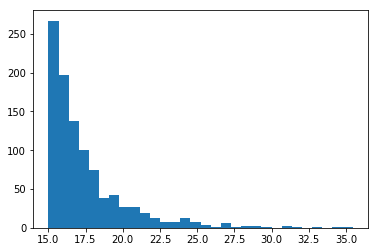

In [232]:
sample = draw_pareto(1000, alpha = 7, xm = XM)
plot_histogram(data = sample, num_bins = 30)

In [233]:
one_point_likelihood = get_one_point_likelihood(x = 5.5, xm = XM)
sample_likelihood  = get_sample_likelihood(sample, xm = XM)
print(one_point_likelihood(alpha = 7))
print(sample_likelihood(alpha = 7))
print(get_maximum_likelihood_alpha(sample, initial = 3, xm = XM))


0
-1887.4639793518534
Optimization terminated successfully.
         Current function value: 1887.345080
         Iterations: 20
         Function evaluations: 40
[7.1090332]


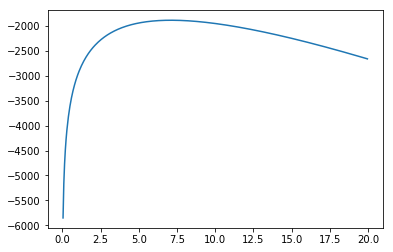

In [234]:
plot_sample_likelihood_by_alpha(sample, xm = XM)

Optimization terminated successfully.
         Current function value: 1891.028677
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1888.406583
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1863.403023
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1849.329626
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1879.800022
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1847.945521
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1857.770237
         Iterations: 22
         Function evaluations: 44
Optimization 

Optimization terminated successfully.
         Current function value: 1876.426591
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1910.573094
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1912.230334
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1895.111372
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1804.377245
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1774.807877
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: 1780.914718
         Iterations: 22
         Function evaluations: 44
Optimization 

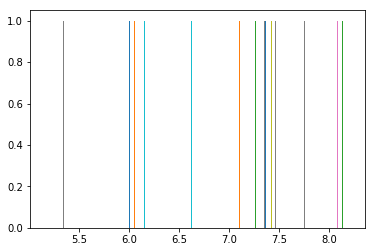

In [235]:
calc_confidence_interval(xm=XM, alpha = 7, n = 100)